# Visualization

We start the **Pattern Recognition** with a better view of the d-dimensional pattern
We understand that each pattern comprises multiple features, essentially forming a feature vector. For instance, $ \left(x_1, x_2, ...,x_d \right)^T $ is such a vector of features. Using appropriate methods to model and visualize data is beneficial. However, the challenge of visualizing multidimensional data can be so significant that it becomes an intriguing area of research. While tables are effective for organizing and visualizing data, they may not always suffice. Sometimes it is much easier to interpret graphs than numbers.Below, various methods for visualizing multidimensional data are presented.


## 2-D scatter plot
To begin with, the visualization of two-dimensional data, commonly employed for illustration in pattern recognition courses, is known as a 2-D scatter plot. An example is provided below:

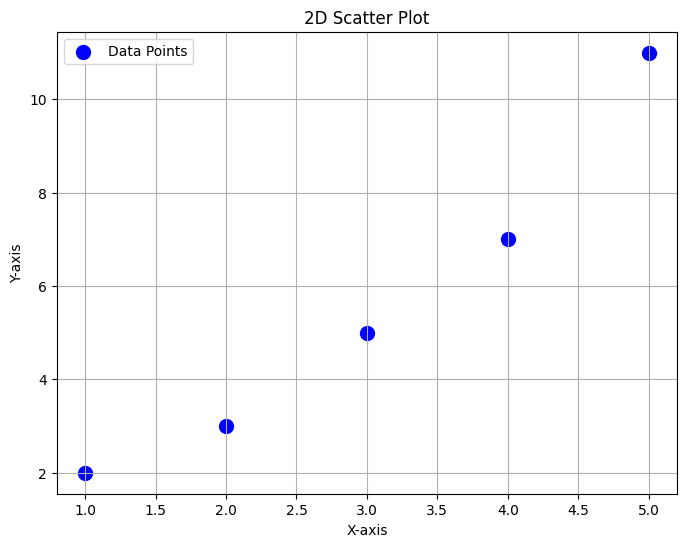

In [2]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create scatter plot
plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.scatter(x, y, color='blue', marker='o', s=100, label='Data Points')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Scatter Plot')

# Add legend
plt.legend()

# Display plot
plt.grid(True)  # Optional: add grid
plt.show()


**Scatter Plots**

A *scatter plot* displays the relation between two numerical variables.

Chernoff Faces and Star Coordinates are alternative methods for data visualization that offer unique perspectives:

## Chernoff Faces: 
This technique represents multivariate data using facial features. Each variable corresponds to a different facial feature (e.g., eyes, nose, mouth), allowing for the visualization of complex datasets in a human-understandable format. ( see https://gist.github.com/aflaxman/4043086). Also you can use https://pypi.org/project/ChernoffFace/

Results:
![chernof face](VisualizationImages/Chernof_1.JPG)

## Star Coordinates:
 This method maps high-dimensional data onto a low-dimensional space using geometric shapes, typically a star. Each axis of the star represents a different dimension, and the position of points within the star reflects their data values. For example, for 8 features, each feature is displayed on one of the axes.

 ![Star_coordinate](VisualizationImages/StarCoordinate.jpg)
 
 This approach enables the visualization of relationships and patterns that may not be apparent in traditional scatter plots or bar charts. Coordinates on the page are calculated as follows:

$$
Horizontal Axis=\sum_{i=1}^{d}\left(x_i* cos\left( \theta _{i} \right) \right)
$$
$$
Vertical Axis=\sum_{i=1}^{d}\left(x_i* sin\left( \theta _{i} \right) \right)
$$

where $ \ x_i $  is i' th feature. in the above figure $ \theta_{1}=1*\frac{360}{8}, ..., \theta_{i}=i*\frac{360}{8} $

One of our published works is in the journal Applied Soft Computing, which addresses this topic.

**H. Sadoghi Yazdi, et, al. "Discernible visualization of high dimensional data using label  information" 27, 2015, 474-486**

[Visualization Paper](VisualizationImages/DiscernibleVisualization.pdf)

In this work, we attempt to correct the angle between axes using user feedback, a technique known as relevance feedback, which is also related to semi-supervised learning.
abstract of this work: This method aims to identify the best two-dimensional perspective that reduces intra-cluster distances while increasing inter-cluster distances, utilizing label information. We refer to this perspective as a discernible visualization, making clusters easily distinguishable to the human eye. Labels can come from user input or from a traditional clustering algorithm applied to the dataset. Our approach optimizes the Star Coordinate representation by framing the problem as a Fisher discriminant maximization, ensuring a singular global solution with polynomial time complexity. We also demonstrate that adjusting the scaling factor alone effectively creates any desired visualization mapping. Additionally, we establish that visualizing k-dimensional data can be represented as an eigenvalue problem. Using this framework, optimal adjustments to axes in the Star Coordinate method for high-dimensional data can be achieved without requiring user intervention.


### Innovation in this paper:

Here is the corrected version of your equations:

$$
Horizontal Axis = \sum_{i=1}^{d} \left( \alpha_i \cdot x_i \cdot \cos \left( \theta_i \right) \right)
$$

$$
Vertical Axis = \sum_{i=1}^{d} \left( \alpha_i \cdot x_i \cdot \sin \left( \theta_i \right) \right)
$$


In this method, the parameter $\alpha_i$ is controlled by relevance feedback. After observing the mapped data in two dimensions, the user determines which data points need labeling. Once the user labels these data points, a new Star Coordinate representation is constructed with updated $\alpha_i$ values. This iterative process helps identify which samples require labeling. This operation is well-suited for [Active Learning in machine learning](https://en.wikipedia.org/wiki/Active_learning_(machine_learning)).

By leveraging user feedback, the system continually refines the visualization, ensuring that the most relevant data points are highlighted for further analysis. This feedback loop enhances the overall effectiveness of the data exploration process, making it more interactive and adaptive. Additionally, incorporating user input helps in managing the labeling process more efficiently, focusing on the most informative samples and thereby reducing the overall labeling effort. This technique aligns well with active learning principles, where the goal is to achieve high accuracy with minimal labeled data by selecting the most useful samples for training.

## Andrews plot:

The Andrews plot, also known as Andrews curve, is a way to visualize multidimensional data by representing each data point as a function in a two-dimensional plot. This method is particularly useful for identifying patterns and clusters in high-dimensional datasets.

### Mathematical Explanation

Given a data point  $x = (x_1, x_2, ..., x_p)$  in a p -dimensional space, the Andrews plot maps it to a function  $ f(t) $  defined on the interval  $ [- \pi, \pi] $ :

$$
f_x(t) = \frac{x_1}{\sqrt{2}} + x_2 \sin(t) + x_3 \cos(t) + x_4 \sin(2t) + x_5 \cos(2t) + \ldots 
$$

In general, the function is expressed as:

$$
f_x(t) = \frac{x_1}{\sqrt{2}} + \sum_{i=2}^{p} \left( x_i \sin\left(\left\lceil \frac{i}{2} \right\rceil t\right) + x_i \cos\left(\left\lfloor \frac{i}{2} \right\rfloor t\right) \right) 
$$

Where $ ( \lceil \cdot \rceil ) and ( \lfloor \cdot \rfloor )$  represent the ceiling and floor functions, respectively.

### Explanation

- **Mapping High Dimensions to 2D**: Each data point in the high-dimensional space is represented as a unique curve in the Andrews plot. The idea is that similar data points will produce similar curves, making clusters and outliers visually identifiable.
- **Periodicity**: The interval  $ ([- \pi, \pi])$  ensures that the functions are periodic, allowing the entire range of the data to be represented within a fixed interval.
- **Smoothing**: The use of sinusoidal functions helps in smoothing the representation, which can make patterns more discernible.

### Example

Let's consider a simple example with three-dimensional data points $ ((x_1, x_2, x_3))$ :

$$
f_x(t) = \frac{x_1}{\sqrt{2}} + x_2 \sin(t) + x_3 \cos(t)
$$

This means each data point is represented as a function combining the constant, sine, and cosine components. 

### Implementation in Python

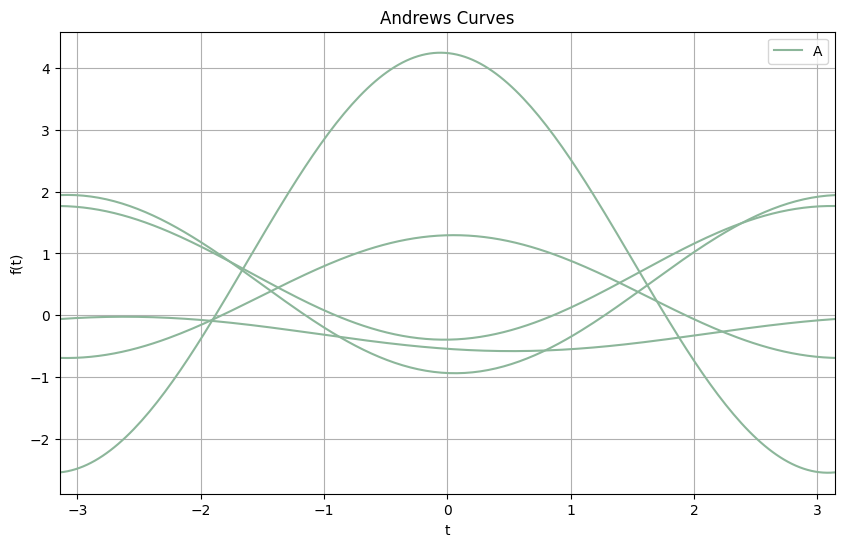

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves

# Sample data
data = pd.DataFrame({
    'feature1': np.random.randn(5),
    'feature2': 0.1*np.random.randn(5),
    'feature3': 1.4*np.random.randn(5),
    'label': np.random.choice(['A', 'B'], size=5)
})

# Plotting Andrews Curves
plt.figure(figsize=(10, 6))
andrews_curves(data, 'label')
plt.title('Andrews Curves')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

### Andrews plot Visualization

In the Andrews plot:

- Each curve represents a data point from the dataset.
- Similar data points (in terms of their features) will have similar shapes.
- Different clusters or categories can be easily distinguished by the shape and behavior of their corresponding curves.

### Applications

- **Cluster Analysis**: By observing the shape and grouping of curves, one can identify natural clusters in the data.
- **Outlier Detection**: Outliers will appear as curves that significantly differ from the rest.
- **Feature Analysis**: Helps in understanding the influence of different features on the data distribution.

## Self-Organizing Map (SOM):
A Self-Organizing Map (SOM) is a type of artificial neural network that is trained using unsupervised learning to produce a low-dimensional (typically two-dimensional) representation of high-dimensional data. This representation is often referred to as a "map" and is useful for visualizing complex data. Here's an overview of SOM, including its characteristics, working principles, and applications:

### Working Principle

1. **Initialization**: The weight vectors of the neurons are initialized, typically with small random values or by sampling from the input space.

2. **Training Process**: The SOM training involves iteratively updating the weight vectors based on the input data. Each iteration consists of the following steps:
   - **Input Selection**: A data point from the input space is randomly selected.
   - **Best Matching Unit (BMU)**: The neuron with the weight vector closest to the input data point (according to some distance metric, usually Euclidean distance) is identified. This neuron is called the Best Matching Unit (BMU).
   - **Weight Update**: The weight vectors of the BMU and its neighboring neurons are adjusted to be closer to the input data point. The update rule typically involves a learning rate and a neighborhood function that decreases over time and with distance from the BMU.

$$
[
\mathbf{w}_i(t+1) = \mathbf{w}_i(t) + \alpha(t) \cdot h_{ci}(t) \cdot (\mathbf{x}(t) - \mathbf{w}_i(t))
]
$$

   where:
   
- $ \mathbf{w}_i(t) $  is the weight vector of neuron \(i\) at time \(t\),
- $ \alpha(t) $  is the learning rate at time \(t\),
- $ h_{ci}(t) $ is the neighborhood function centered on the BMU \(c\),
- $ \mathbf{x}(t) $ is the input vector at time \(t\).
   


3. **Convergence**: The training process continues for a predefined number of iterations or until the changes in the map become negligible. Over time, the map organizes itself to reflect the structure of the input data.

### Applications

1. **Data Visualization**: SOMs are widely used for visualizing high-dimensional data in a two-dimensional space, making it easier to identify clusters, patterns, and relationships.
2. **Clustering**: SOMs can be used for clustering similar data points together, making them useful in exploratory data analysis.
3. **Dimensionality Reduction**: SOMs reduce the dimensionality of data while preserving its topological features, making it easier to handle and interpret large datasets.
4. **Feature Extraction**: SOMs can be used to extract important features from the data, which can then be used in other machine learning models.
5. **Anomaly Detection**: By identifying data points that do not fit well into the established clusters, SOMs can be used to detect anomalies or outliers in the data.

### Example Implementation in Python


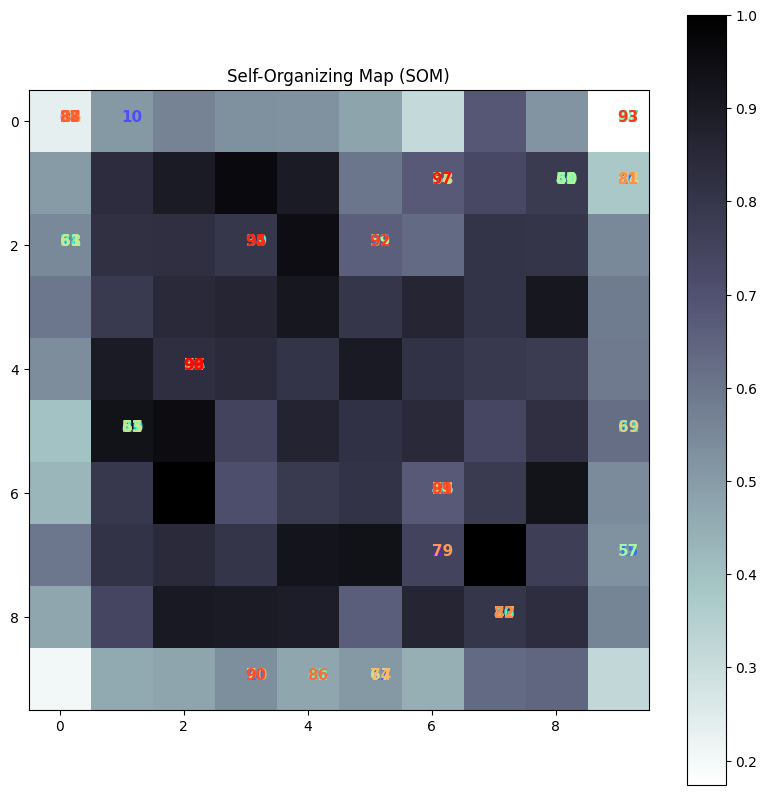

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

# Sample data: 100 points in a 3D space
data = np.random.rand(100, 3)

# Initialize SOM with a 10x10 grid and input dimension of 3
som = MiniSom(10, 10, 3, sigma=0.3, learning_rate=0.5)

# Train the SOM
som.train_random(data, 100)

# Plotting the SOM
plt.figure(figsize=(10, 10))
plt.title('Self-Organizing Map (SOM)')

# Plotting the data points
for i, x in enumerate(data):
    w = som.winner(x)
    plt.text(w[0], w[1], str(i), color=plt.cm.rainbow(i / 100.0), fontdict={'weight': 'bold', 'size': 11})

# Creating a heatmap of distances
distance_map = som.distance_map().T
plt.imshow(distance_map, cmap='bone_r', interpolation='nearest')
plt.colorbar()

plt.show()


### Visualization of the SOM

- **Grid Representation**: The resulting SOM grid shows how different data points map to different neurons. Each neuron's position on the grid corresponds to a weight vector that represents a cluster center in the input space.
- **Clustering**: Similar data points map to the same or nearby neurons, forming clusters. This makes it easy to identify patterns and relationships in the data.

The Self-Organizing Map is a powerful tool for visualizing and interpreting high-dimensional data, making it a valuable technique in the data scientist's toolkit.

### Exercise: Check the above code with another applicable dataset and interpret the output carefully. 

## Some of my papers about **SOM** are:

1. A Allahyar, HS Yazdi, A Harati. "Constrained Semi-Supervised Growing Self-Organizing Map." Neurocomputing, vol. 147, pp. 456-471.

2. A Allahyar, HS Yazdi. "Initial Free Self-Organizing Map by Aggregation." International Journal of Control and Automation, vol. 6, no. 2, pp. 81-98.

3. H Sadoghi Yazdi, A Mohiaddini, M Khademi. "Geometrical Self-Organizing Map Classifier Based on Active Learning for Steganalysis in the Video Environment by Spending at Least a Label." Nashriyyah-i Muhandisi-i Barq va Muhandisi-i Kampyutar-i Iran, vol. 62, no. 1, pp. 28.

4. A Mehrizi, HS Yazdi, AH Taherinia. "Robust Semi-Supervised Growing Self-Organizing Map." Expert Systems with Applications, vol. 105, pp. 23-33.


### Explanation of First Paper [[Ref. 1]]
One of the papers mentioned above is about the [Semi-Supervised Growing Self-Organizing Map (SOM)](https://www.sciencedirect.com/science/article/abs/pii/S092523121400811X). This study explores how adding the growing property to the SOM network, known as the [Growing Self-Organizing Map (GSOM)](https://en.wikipedia.org/wiki/Growing_self-organizing_map), enhances its capabilities.

This paper first addresses the concept of semi-supervised learning in conjunction with classification and clustering, as illustrated in the following figure.

![SemiSupervised Concept Classification](VisualizationImages/SemiSupervisedConcept.JPG)

At the same time, GSOM and supervised classification learn data with and without labeles as shown below,
![SSGSOM Network](VisualizationImages/StructureofSemiSupervisedGSOM.JPG)

## Homework
Students have the opportunity to review Figure 3 presented in this document and submit their assignments, including the necessary code, in a Jupyter Notebook format.
Or 
Review the [seaborn : statistical data visualization](https://seaborn.pydata.org/)
